# Week 7 Lecture Notebook

## Introduction to Data Moves Using Python

Today we will …

- import Python libraries.
- apply the calculate data move.
- visualize categorical and numerical data.

## Calculate

The calculate data move involves creating new variables or attributes from existing data to uncover insights, highlight relationships, or simplify analysis. This can include applying formulas, combining columns, converting units, or defining new categories based on conditional logic.

We will se this technique to add new features to the crabs dataset.

In [4]:
import pandas as pd

In [5]:
crabs = pd.read_csv('data/crabs.csv')
crabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3893 non-null   object 
 1   length          3893 non-null   float64
 2   diameter        3893 non-null   float64
 3   height          3893 non-null   float64
 4   weight          3893 non-null   float64
 5   shucked_weight  3893 non-null   float64
 6   viscera_weight  3893 non-null   float64
 7   shell_weight    3893 non-null   float64
 8   age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


## User-Defined Functions

In Python, a user-defined function is a reusable block of code created with the `def` keyword to perform a specific task. Functions make code more organized and efficient by allowing you to define logic once and reuse it. They can take inputs, process data, and return outputs.

### The Parts of a User-Defined Function 

A Python function has several key parts:

- Function definition (`def`): The keyword `def` tells Python you’re defining a new function.
- Function name: A descriptive name that identifies what the function does (e.g., `calculate_average`).
- Parameters: Variables inside parentheses that receive input values when the function is called.
- Docstring (`""" """`): A short description inside triple quotes that explains what the function does; it helps others (and you) understand its purpose.
- Colon (`:`): Indicates the start of the function body.
- Function body: The indented block of code that runs when the function is called.
- Return statement (`return`): Sends a result back to the part of the program that called the function.

For example:

```python
def calculate_average(numbers):
    """
    Calculates the average of a list of numbers.
    
    Parameter:
        numbers (list): A list of numeric values.
    
    Returns:
        float: The average of the numbers.
    """
    total = sum(numbers)
    average = total / len(numbers)
    return average
```

The functions below can be used to create new features, such as predicting the crab’s likely species or identifying whether it was farm-raised or caught in the wild.

In [6]:
def classify_species(d):
    """
    Classify the crab species based on its diameter.

    Parameter:
        d (float): Diameter of the crab in feet.

    Returns:
        str: The likely species of the crab.
    """
    if d < 0.3:
        return "Juvenile"
    elif d < 0.75:
        return "Blue"
    elif d < 0.9:
        return "Dungeness"
    elif d < 1.3:
        return "Red King"
    else:
        return "Tasmanian"

def classify_farming_status(d):
    """
    Classify whether a crab is likely farm-raised or caught in the wild 
    based on its diameter.

    Parameter:
        d (float): Diameter of the crab in feet.

    Returns:
        int: 1 if likely farm-raised, 0 if likely caught in the wild.
    """
    if 0.4 <= d <= 0.9:
        return 1
    else:
        return 0

### `.apply()`

The `.apply()` method in Pandas is used to apply a custom function to each element, row, or column of a `DataFrame` or `Series`. For example, you can use `.apply()` to classify, calculate, or clean values across an entire column using a user-defined function. This makes it useful for creating new features or performing custom computations.

In [7]:
# Create a new column species by applying the classify_species() function 
# to each value in the diameter column
crabs["species"] = crabs["diameter"].apply(classify_species)

# Create a new column farming_status by applying the classify_farming_status() 
# function to each value in the diameter column
crabs["farming_status"] = crabs["diameter"].apply(classify_farming_status)

Verify that the new features were added to the `crabs` dataset. 

In [8]:
crabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3893 non-null   object 
 1   length          3893 non-null   float64
 2   diameter        3893 non-null   float64
 3   height          3893 non-null   float64
 4   weight          3893 non-null   float64
 5   shucked_weight  3893 non-null   float64
 6   viscera_weight  3893 non-null   float64
 7   shell_weight    3893 non-null   float64
 8   age             3893 non-null   int64  
 9   species         3893 non-null   object 
 10  farming_status  3893 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 334.7+ KB


## Purpose and Fundamentals of Data Visualization

Data visualization is the practice of representing data graphically to reveal patterns, trends, and insights that might be difficult to interpret from raw numbers alone. Effective visualizations simplify complex information, making it easier to communicate findings, support decision-making, and identify relationships within data. The fundamentals of data visualization include selecting appropriate graphical representations, ensuring clarity and accuracy, and emphasizing key insights while avoiding misleading representations (Tufte 2001). 

While data visualization involves many concepts, techniques, and considerations, our discussion will focus on fundamental visualization types commonly used in exploratory data analysis, including bar charts, histograms, box plots, line charts, and scatter plots. These visualizations can be created in both Python and R. 

### Matplotlib

`matplotlib.pyplot` is a module within the Matplotlib library that makes it easy to create visualizations in Python. 

```python
import matplotlib.pyplot as plt
```

Each command in `pyplot` such as `plt.plot()` and `plt.title()` controls part of a figure. This allows you  to build and customize your visualization.

**Note:** To learn more about visualizations in `matplotlib` click [here](https://matplotlib.org/stable/) and for documentation on creating visualizations using `pandas` click [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Import the necessary libraries for creating our visualizations.

In [9]:
import matplotlib.pyplot as plt

## Data Dive with Visualizations

In the Data Moves framework, visualize is one of the key data moves and often builds on earlier steps like selecting, filtering, grouping, and summarizing. After you choose which data to focus on, organize it into meaningful groups, and calculate summaries or aggregates, the visualize move transforms those results into charts or graphs that reveal patterns, trends, or relationships.

## Bar Chart

A bar chart is a graphical representation of categorical data where each category is represented by a bar, with the height or length of the bar corresponding to its value. It is used to compare the frequency, count, or other metrics across different categories. Bar charts are ideal when you need to visually compare discrete categories or show trends over time. 

This can be done using `pandas`.

```python
df.plot.bar('column_name')
```

or using `matplotlib`

```python
plt.bar('column_name')
```

**Example 1.** Create a bar chart to display the frequency of each category.

In [10]:
tbl = crabs['species'].value_counts()
tbl

Red King     2359
Blue          566
Dungeness     514
Tasmanian     440
Juvenile       14
Name: species, dtype: int64

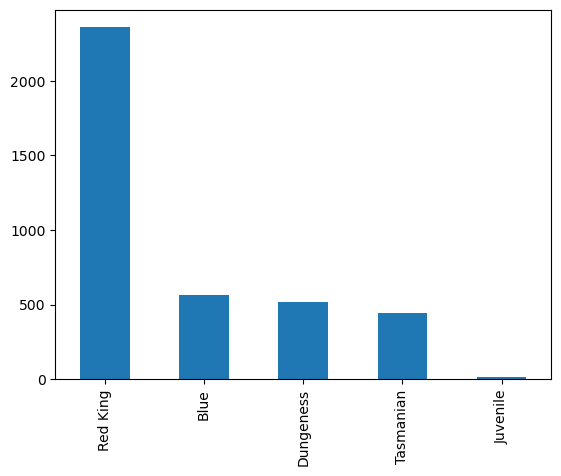

In [11]:
tbl.plot.bar();

**Example 2.** Add a title to your bar chart.

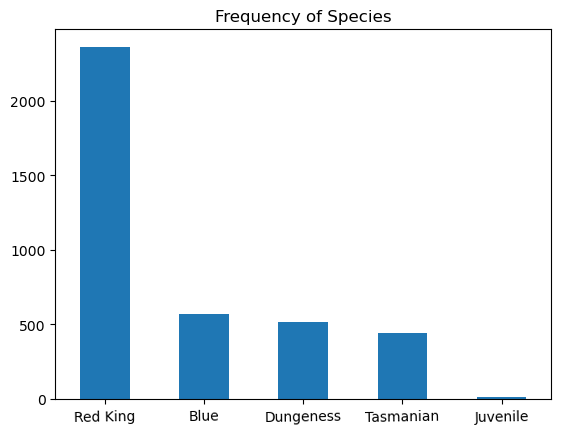

In [12]:
tbl.plot.bar(rot = 1)

plt.title('Frequency of Species');

**Example 3.** Rotate the labels.

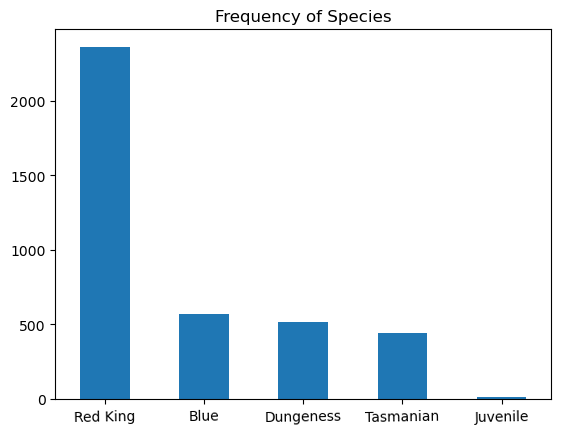

In [14]:
tbl.plot.bar(rot = 1)

plt.title('Frequency of Species');

**Example 5.** Create a stacked bar chart.

In [19]:
tbl = pd.crosstab(crabs['species'], crabs['sex'])
tbl

sex,F,I,M
species,,,
Blue,30,431,105
Dungeness,93,314,107
Juvenile,0,12,2
Red King,878,471,1010
Tasmanian,224,5,211


NameError: name 'Sex' is not defined

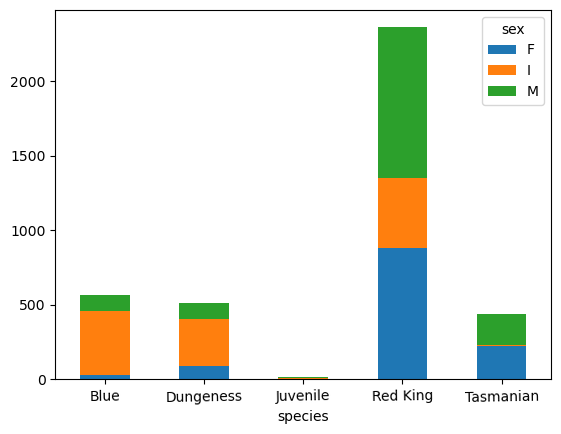

**Example 6.** Customize the legend by adding a title and labels, then include clear axis labels.

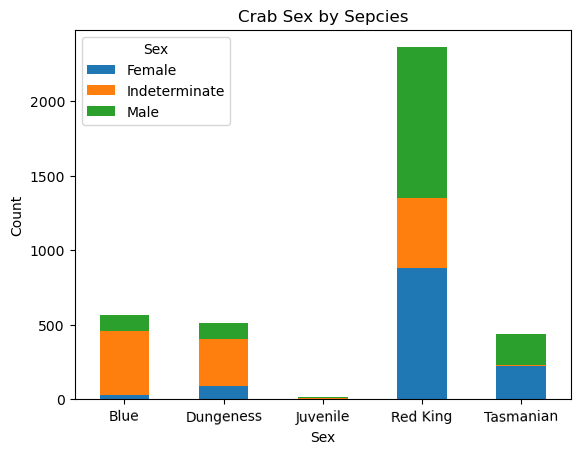

In [27]:
tbl.plot.bar(rot = 1, stacked = True)

plt.title('Crab Sex by Sepcies')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(
    title = 'Sex',
    labels = ['Female', 'Indeterminate', 'Male'],
    loc = 'upper left'
);

## Histogram

A histogram is a graphical representation of the distribution of numerical data. Unlike a bar chart, which displays categorical data, a histogram groups continuous data into bins (ranges) and shows the frequency or count of data points within each bin. The height of each bar represents the number of data points that fall within each bin.

This can be done using `pandas`:

```python
df['column_name'].plot.hist()
```

or using `matplotlib`:

```python
plt.hist(df['column_name'])
```

**Example 7.** Create a histogram to display the distribution.

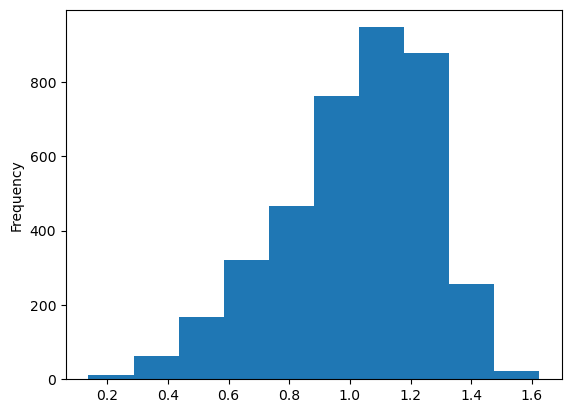

In [28]:
crabs['diameter'].plot.hist();

**Exaple 8.** Customize your histogram by adding contrasting edge colors to the bars and including a title and axis labels.

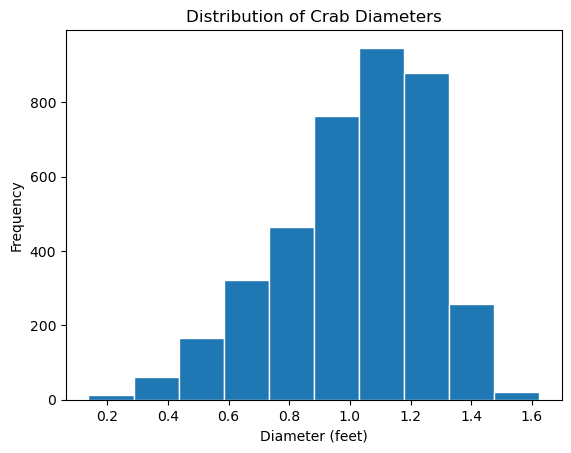

In [29]:
crabs['diameter'].plot.hist(grid = False, edgecolor = 'white');

plt.title('Distribution of Crab Diameters')
plt.xlabel('Diameter (feet)')
plt.ylabel('Frequency');

## Box Plot

A boxplot is a way of displaying the distribution of data based on a five-number summary. 

- Median (Q2): The line inside the box represents the median (the middle value of the data set).

- First quartile (Q1): The lower edge of the box, representing the 25th percentile (where 25% of the data lies below this value).

- Third quartile (Q3): The upper edge of the box, representing the 75th percentile (where 75% of the data lies below this value).

- Interquartile Range (IQR): The range between the first quartile (Q1) and third quartile (Q3), which contains the middle 50% of the data.

- Whiskers: These extend from the edges of the box to the smallest and largest values within 1.5 times the IQR from Q1 and Q3, respectively. They represent the range of most of the data.

- Outliers: Data points outside the whiskers are considered outliers and are usually plotted as individual dots.

This can be done using `pandas`:

```python
df.plot.box(column = 'column_name')
```

or using `matplotlib`:

```python
plt.boxplot(df['column_name'])
```

**Example 9.** Create a box plot to display the distribution and show the median, quartiles, and any potential outliers.

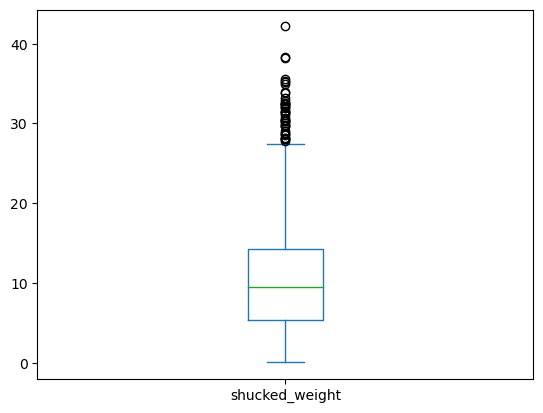

In [30]:
crabs.plot.box(column = 'shucked_weight');

**Example 10.** Create a box plot that compares crab shucked weight across sex categories.

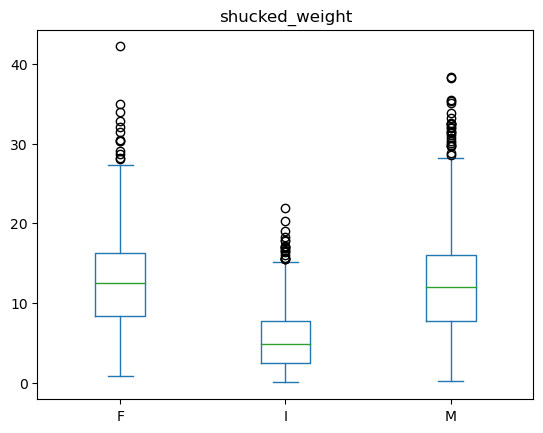

In [31]:
crabs.plot.box(column = 'shucked_weight', by = 'sex');

**Example 11.** Customize your boxplot by adding a title and axis labels and replacing the default $x-$axis labels with full names.

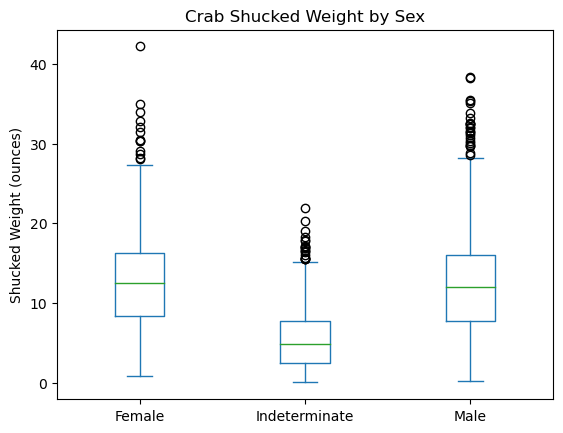

In [32]:
crabs.plot.box(column = 'shucked_weight', by = 'sex')

plt.title('Crab Shucked Weight by Sex')
plt.suptitle('')
plt.xlabel('')
plt.xticks(ticks = [1, 2, 3], labels = ['Female', 'Indeterminate', 'Male'])
plt.ylabel('Shucked Weight (ounces)');

## Scatter Plot

A scatterplot is a graphical representation used to display the relationship between two continuous variables. Each point on the plot represents an observation, with the position of the point determined by the values of the two variables. The $x-$axis represents one variable, and the $y-$axis represents the other.

This can be done using `pandas`:

```python
df.plot.scatter(x = 'column_name', y = 'column_name')
```

or using `matplotlib`:

```python
plt.scatter(df['column_name'], df['column_name'])
```

**Example 12.** Select two numerical variables and create a scatter plot to display their relationship. Use one variable for the $x-$axis and the other for the $y$-axis.

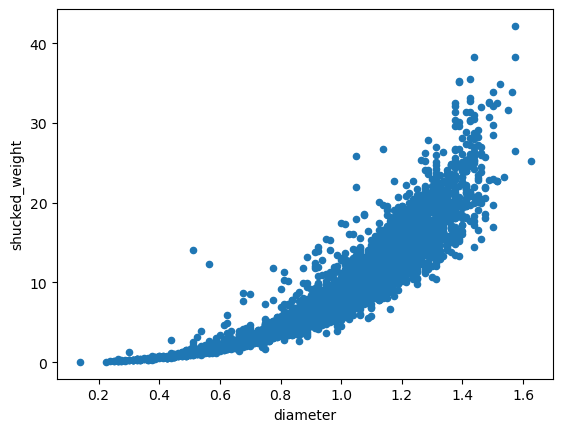

In [33]:
crabs.plot.scatter(x = 'diameter', y = 'shucked_weight');

**Example 13.** Customize your scatterplot by adding a contrasting edge color to the points and including a title and axis labels.

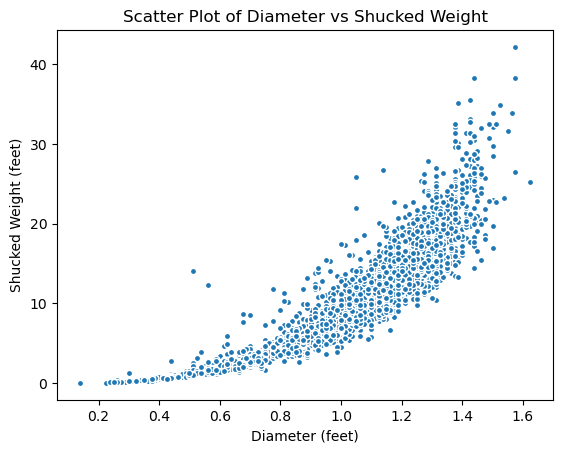

In [34]:
crabs.plot.scatter(x = 'diameter', y = 'shucked_weight', edgecolor = 'white')

plt.title('Scatter Plot of Diameter vs Shucked Weight')
plt.xlabel('Diameter (feet)')
plt.ylabel('Shucked Weight (feet)');

**Example 14.** Customize your scatter plot by adding color to the points to represent different crab sex categories.

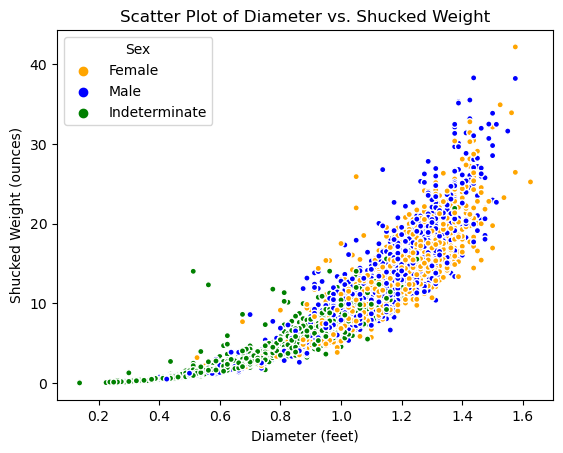

In [35]:
# Define a color map that assigns a unique color to each sex category
color_map = {'F': 'orange', 'M': 'blue', 'I': 'green'}

crabs.plot.scatter(
    x = 'diameter',
    y = 'shucked_weight',
    
    # .map() transforms or replaces values in a Series (a single 
    # column of a DataFrame) according to a specified rule or mapping
    
    # Map each value in the sex column to its corresponding 
    # color using the color_map dictionary
    c = crabs['sex'].map(color_map),
    edgecolor = 'white'
)

plt.title('Scatter Plot of Diameter vs. Shucked Weight')
plt.xlabel('Diameter (feet)')
plt.ylabel('Shucked Weight (ounces)')

# Create an invisible scatter point to add a custom legend entry 
# for Female, Male, and Indeterminate
plt.scatter([], [], color = 'orange', label = 'Female')
plt.scatter([], [], color = 'blue', label = 'Male')
plt.scatter([], [], color = 'green', label = 'Indeterminate')
plt.legend(title = 'Sex', loc = 'upper left');

## Line Plot

A line plot is used to display trends or changes over time by connecting data points with straight lines. It’s especially useful when visualizing how a variable changes across a continuous interval such as days, months, or years. Before creating a line plot, it’s common to aggregate your data (for example, computing the average or total for each time period).

This can be done using `pandas`:

```python
df.plot.line(x = 'column_name', y = 'column_name')
```

or using `matplotlib`:

```python
plt.plot(df['column_name'], df['column_name'])
```

**Note:** If your data includes groups or categories, you should first aggregate your data (for example, using `.groupby()`) before plotting to summarize values.

```python
df.groupby('column_name')['column_name'].mean().plot.line()
```

### Flights

Our dataset, called the "Flights" dataset, belongs to the Seaborn library. This dataset provides a monthly tally of airline passengers from 1949 to 1960.

The Flights dataset comprises three distinct columns:

year: Represents the year in which the count of passengers was taken.
month: Points towards the month in which the passenger count was gathered.
passengers: Indicates the number of passengers that traveled in that month of a particular year.

In [79]:
import seaborn as sns
flights = sns.load_dataset('flights')
flights.to_csv('data/flights.csv', index=False)

In [67]:
ss = pd.read_csv('data/skyscrapers_world.csv')
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        102 non-null    int64 
 1   name              102 non-null    object
 2   city              100 non-null    object
 3   country           102 non-null    object
 4   status.started    100 non-null    object
 5   status.completed  102 non-null    object
 6   height in meters  102 non-null    object
 7   height            102 non-null    object
 8   floors            102 non-null    object
 9   material          102 non-null    object
 10  function          102 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.9+ KB


Run the code below to process the data for analysis.

In [68]:
ss = ss.rename(
    columns = {
        'status.started' : 'status_started',
        'status.completed' : 'status_completed',
        'height in meters' : 'height_meters'
    }
)

ss.loc[48, 'floors'] = 103
ss.loc[61, 'floors'] = 73

ss.loc[55, 'status_completed'] = '2017'
ss.loc[64, 'status_completed'] = '2012'
ss.loc[65, 'status_completed'] = '2013'

ss['floors'] = ss['floors'].astype(int)
ss['height_meters'] = ss.height_meters.str.replace(',', '').astype(float)
                                                                   
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        102 non-null    int64  
 1   name              102 non-null    object 
 2   city              100 non-null    object 
 3   country           102 non-null    object 
 4   status_started    100 non-null    object 
 5   status_completed  102 non-null    object 
 6   height_meters     102 non-null    float64
 7   height            102 non-null    object 
 8   floors            102 non-null    int64  
 9   material          102 non-null    object 
 10  function          102 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.9+ KB


**Example 15.** Create a line plot to visualize how the maximum height of skyscrapers has evolved over time.

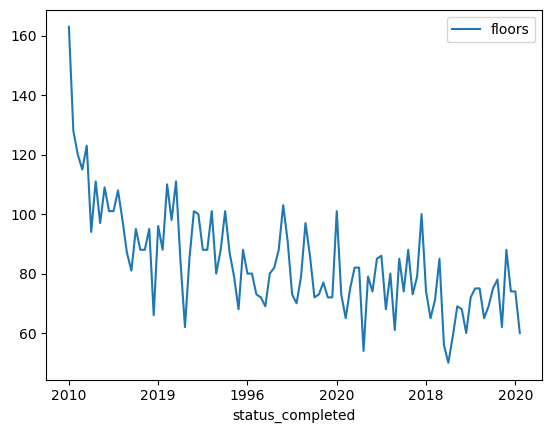

In [73]:
ss.plot.line(x = 'status_completed', y = 'floors');

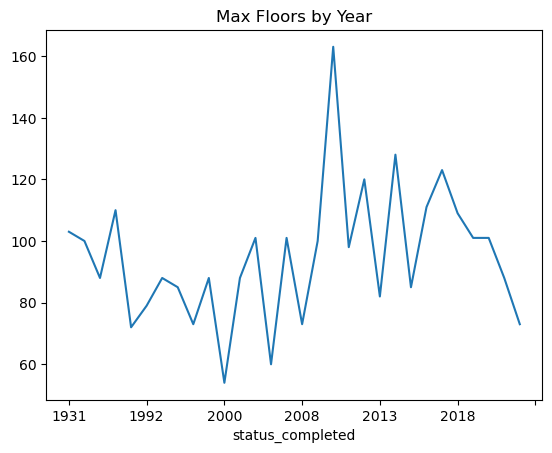

In [74]:
df = ss.groupby('status_completed')['floors'].max()

df.plot.line(title = "Max Floors by Year");

## References

Tufte, E. R. (2001). _The visual display of quantitative information (2nd ed.)_. Graphics Press.

## Submission

Make sure that all cells in your assignment have been executed to display all output, images, and graphs in the final document.

**Note:** Save the assignment before proceeding to download the file.

After downloading, locate the `.ipynb` file and upload **only** this file to Moodle. The assignment will be automatically submitted to Gradescope for grading.